In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Sample 

- **A discrete measurement of audio signal's amplitude at specifc moment in time.**
- The array y contains these samples where each element in y is a single measurement of the audio signal.

## Sampling rate  
- **How many samples are captured per second in the audio signal.**
- It is usually measured in Hertz.


In [ ]:
# Load audio file
# y = time series representation of audio
# sr = sample rate, None is original sample rate.
def load_audio(file_path, duration_sec):
    y, sr = librosa.load(file_path, sr=None, duration=duration_sec)  
    y = y / np.max(np.abs(y)) # Normalize
    print("Max value:", np.max(y))
    print("Min value:", np.min(y))
    return y, sr 

file_path_music = r"C:\Users\samar\OneDrive\Documents\CS5100\Project\Sample\Hotel_california.wav" # change this
file_path_note = r"C:\Users\samar\OneDrive\Documents\CS5100\Project\Sample\c3.wav" 
y, sr = load_audio(file_path_music, duration_sec=20)  


In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('C3 ')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Fourier Transform

- **Allows us to decompose signals (sound waves) into basic building blocks—sine waves of different frequencies.**
- It transforms a **time domain** signal into a **frequency domain** representation.

### Time Domain:
- The signal is represented as a **change in amplitude over time**, like the raw audio waveform.

### Frequency Domain:
- The signal is represented by its **constituent frequencies**, showing how much of each frequency is present in the signal.

- [Interactive guide to the Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

### Limitation:
- The **Fourier Transform loses information about time**: it tells you **what frequencies** are present, but not **when** they occur in the signal.

---


## Short-Time Fourier Transform (STFT)

- **Extends the Fourier Transform** to handle signals whose frequency content changes over time by analyzing **small sections (windows)** of the signal at a time.
- Instead of analyzing the entire signal at once (like the Fourier Transform), **STFT divides the signal into overlapping windows** of fixed length.
- The Fourier Transform is applied to each window separately, capturing both **time** and **frequency** information.
- By sliding the window across the signal, **STFT captures how the frequency content changes over time**.

### Frequency Bins in STFT:
- **Frequencies are evenly spaced**. For example, analyzing frequencies between 0 Hz and 22 kHz, each frequency bin might be spaced by 100 Hz.
- All frequencies are treated equally, whether low or high.

### Example of Frequency Bins in STFT:
- 0 Hz, 100 Hz, 200 Hz, 300 Hz, ... up to 22,000 Hz
---


# Why Use Constant-Q Transform (CQT)?

- In **CQT**, frequencies are **logarithmically spaced**, meaning the spacing between frequency bins **gets wider as the frequencies get higher**.
- This is **how musical notes work**, as each **octave represents a doubling of frequency**.

### Example of Frequency Bins in CQT:
- 32 Hz (C1), 65 Hz (C2), 130 Hz (C3), 261 Hz (C4), 523 Hz (C5), etc.

- The spacing between low frequencies is narrow, but the spacing between high frequencies is wider.


In [ ]:
# Compute Constant-Q Transform

def compute_cqt(y, sr, hop_size, bins_per_octave): #
    # Compute the CQT 
    C = librosa.cqt(y, sr=sr, hop_length=hop_size, bins_per_octave=bins_per_octave, fmin=130) #
    # Convert the CQT to decibels for better visualization
    C_dB = librosa.amplitude_to_db(np.abs(C), ref=np.max)
    return C_dB # A CQT spectrogram matrix, where rows correspond to frequencies and columns correspond to time frames.


cqt_spectrogram = compute_cqt(y, sr, hop_size=512, bins_per_octave=24)  # 512 is default.
dim = cqt_spectrogram.shape
rows, cols = dim

rows,cols # total notes, frames
cqt_spectrogram

In [ ]:
def plot_cqt(cqt_spectrogram, sr, yxs, max_freq):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(cqt_spectrogram, sr=sr, x_axis='time', y_axis=yxs, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q Transform (CQT) Spectrogram with Frequency')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(32, max_freq)  
    plt.show()
    
# plot_cqt(cqt_spectrogram, sr, yxs='cqt_note', max_freq=1024), 
plot_cqt(cqt_spectrogram, sr, yxs='cqt_hz', max_freq=1024) 




In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(cqt_spectrogram, sr=sr, x_axis='time', y_axis='cqt_note', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT Spectrogram')
plt.show()

In [ ]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_normalized = (chroma - np.mean(chroma)) / np.std(chroma)

# Plot Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_normalized, y_axis='chroma', x_axis='time', cmap='coolwarm', sr=sr)
plt.colorbar()
plt.title('Chroma Features (Normalized)')
plt.show()

chroma

chroma.shape

In [ ]:
# from specmurtanalysis import specmurt_analysis 
# # Define parameters
# min_freq, max_freq = 60, 8000  # Frequency range
# num_harmonics = 10  # Number of harmonics to consider

# # Calculate CQT frequencies directly based on the spectrogram size and the minimum frequency
# cqt_frequencies = librosa.cqt_frequencies(n_bins=cqt_spectrogram.shape[0], fmin=min_freq,fmax=max_freq, bins_per_octave=12)

# # Perform specmurt analysis on the CQT spectrogram
# clean_spectrogram = specmurt_analysis(cqt_frequencies=cqt_frequencies, num_harmonics=num_harmonics, C_dB=cqt_spectrogram, alpha=1.5)

# # Output the clean spectrogram
# print(clean_spectrogram)

In [ ]:
# import matplotlib.pyplot as plt
# librosa.display.specshow(librosa.amplitude_to_db(clean_spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', cmap='magma')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Specmurt-Enhanced CQT Spectrogram')
# plt.show()

In [ ]:
# mean_original = np.mean(cqt_spectrogram)
# mean_specmurt = np.mean(clean_spectrogram)
# print(f"Mean Amplitude of Original CQT: {mean_original:.2f}")
# print(f"Mean Amplitude of Specmurt-Enhanced CQT: {mean_specmurt:.2f}")

# # Compare variance, which can indicate changes in harmonic emphasis
# var_original = np.var(cqt_spectrogram)
# var_specmurt = np.var(clean_spectrogram)
# print(f"Variance of Original CQT: {var_original:.2f}")
# print(f"Variance of Specmurt-Enhanced CQT: {var_specmurt:.2f}")

In [ ]:
def reshape(spectrogram, n_timesteps):
    # Transpose CQT to match the (time_steps, features) format
    spectrogram = spectrogram.T  # Now each row is a time step, each column is a feature (frequency bin)
    # Split into sequences of n_timesteps
    X = []
    for i in range(0, len(spectrogram) - n_timesteps, n_timesteps):
        X.append(spectrogram[i:i+n_timesteps])
    X = np.array(X)
    return X

In [ ]:
n_timesteps = 50  # Number of time steps for each sequence
X = reshape(cqt_spectrogram, n_timesteps)
print(f"Reshaped data shape for LSTM input: {X.shape}")

## Labeling Data

In [ ]:
def load_raw_data(file_path):
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            start_time, end_time, chord = line.strip().split()
            labels.append((float(start_time), float(end_time), chord))
    return labels

fpath = 'Data/combined_lab_file.lab'
chord_annotations = load_raw_data(fpath)

for label in chord_annotations:
    print(f"Start: {label[0]}s, End: {label[1]}s, Chord: {label[2]}")

In [ ]:
# Aligns CQT with chord annotations by extractingg corresponding CQT frames for reach chord time interval (column in spectrogram)
def align_cqt_with_chords(cqt, sr, hop_length, chord_annotations):
    fps = sr / hop_length  # Compute how many frames represent one second
    aligned_chords = []
    print(fps)
    for start_time, end_time, chord in chord_annotations:
        # Convert start and end times to CQT frame indices
        start_frame = int(np.floor(start_time * fps))
        end_frame = int(np.ceil(end_time * fps))
        # Extract the relevant CQT frames and associate them with the chord label
        aligned_chords.append((cqt[:, start_frame:end_frame], chord))
    
    return aligned_chords

aligned_chord_segments = align_cqt_with_chords(cqt_spectrogram, sr=48000, hop_length=512, chord_annotations=chord_annotations)

# Print the first aligned segment and chord
print(f"CQT Segment Shape: {aligned_chord_segments[0][0].shape}, Chord: {aligned_chord_segments[0][1]}")


In [ ]:
# steps
# load audio from db
# generate cqt spectrograms i.e. feature extraction
# align the extracted cqt frames with chord annotations, ensuring each cqt has corresponding chord label
# use cqt as input data x with processed labels y as the output 

# model
# bidirectional 3 stacked lstm

In [33]:
import os
import librosa

# Set root directory where all track folders are located
root_folder = 'Data/babyslakh_16k/babyslakh_16k'

def load_audio_and_labels(track_folder):
    """
    Loads audio and corresponding label files from a given track folder.
    
    Arguments:
    - track_folder: Path to the track folder containing .wav and .lab files
    
    Returns:
    - audio_data: List of loaded audio arrays
    - sample_rates: List of sample rates corresponding to each audio file
    - chord_labels: List of chord annotations for each time step
    """
    audio_data = []
    sample_rates = []
    chord_labels = []
    
    # Load all .wav files in the track folder
    for file_name in os.listdir(track_folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(track_folder, file_name)
            y, sr = librosa.load(file_path, sr=None)  # Load audio with original sample rate
            audio_data.append(y)
            sample_rates.append(sr)
    
    #  set the label file path based on the track folder name
    track_name = os.path.basename(track_folder)  # Track folder name 
    label_file_name = f"{track_name}.lab"  # Label file name 
    label_path = os.path.join(track_folder, label_file_name)
    
    # Load .lab file if it exists
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = []
            for line in f:
                # Only take the first three values, ignoring any extra ones
                values = line.strip().split()[:3]
                if len(values) == 3:  # Ensure we have exactly three values
                    start, end, chord = values
                    labels.append((float(start), float(end), chord))
            chord_labels.append(labels)
    else:
        print(f"No .lab file found for {track_folder}")
    
    return audio_data, sample_rates, chord_labels


def load_all_tracks(root_folder):
    """
    Walks through the root folder to load audio and label data for all tracks.
    
    Arguments:
    - root_folder: Path to the dataset's root folder
    
    Returns:
    - dataset: List of dictionaries containing audio, sample rate, and labels for each track
    """
    dataset = []
    
    # Traverse through each track folder in the root directory
    for track_name in os.listdir(root_folder):
        track_folder = os.path.join(root_folder, track_name)
        if os.path.isdir(track_folder):
            # Load audio and labels for the current track folder
            audio_data, sample_rates, chord_labels = load_audio_and_labels(track_folder)
            dataset.append({
                'track_name': track_name,
                'audio_data': audio_data, # raw audio data i.e time domain
                'sample_rates': sample_rates,
                'chord_labels': chord_labels
            })
    
    return dataset

# Load the dataset
dataset = load_all_tracks(root_folder)




In [36]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to compute chroma features and get frame count
def compute_cqt(audio_data, sr, hop_length=6400): # hop 6400, giving us frames spaced at .4 sec
    chroma_vectors = []
    frame_counts = []  # To store frame counts for each track
    
    for y in audio_data:
        # Compute chroma features
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)
        chroma_vectors.append(chroma)
        frame_counts.append(chroma.shape[1])  # Number of frames in the chroma matrix (second dimension)

    return chroma_vectors, frame_counts

# Step 3: Preprocess chord labels without num_frames
def align_chord_with_frames(chord_labels, sr, hop_length=6400):
    """
    Maps chord labels to CQT frames, aligns them with CQT frame count,
    and encodes chord labels.
    
    Arguments:
    - chord_labels: List of track chord labels in (start, end, chord) format.
    - sr: Sample rate of audio.
    - hop_length: Hop length used in CQT computation.
    
    Returns:
    - aligned_labels: List of labels aligned with CQT frames.
    - label_encoder: The fitted LabelEncoder instance.
    """
    # Flatten chord labels to fit LabelEncoder and encode unique chords 
    flattened_labels = [chord for track_labels in chord_labels for _, _, chord in track_labels]
    label_encoder = LabelEncoder()
    label_encoder.fit(flattened_labels)

    # start time end time of chord in frames
    annotation = chord_labels[0]
    labels = []
    for start_time, end_time, chord in annotation:
        start_frame = int(start_time * sr / hop_length)
        end_frame = int(end_time * sr / hop_length)
        labels.extend([chord] * (end_frame - start_frame))

    # Encode labels and align with chroma frames
    labels = label_encoder.transform(labels)
    return labels, label_encoder

# Usage of align_chord_with_frames
all_chroma_features = []
all_aligned_labels = []

for track in dataset:
    chroma_features, frame_counts = compute_cqt(track['audio_data'], track['sample_rates'][0], hop_length=6400)
    aligned_labels, label_encoder = align_chord_with_frames(track['chord_labels'], track['sample_rates'][0], hop_length=6400)

    all_chroma_features.append(chroma)
    all_aligned_labels.append(aligned_labels)

# Check if chroma features and labels are aligned for each track
for chroma, labels in zip(all_chroma_features, all_aligned_labels):
    assert chroma.shape[1] == len(labels), f"Mismatch: {chroma.shape[1]} vs {len(labels)}"
print("Chroma features and labels are aligned for all tracks.")


AssertionError: Mismatch: 870 vs 3482

In [4]:
# Verify alignment of chroma features and labels for each track
for i, (chroma, labels) in enumerate(zip(all_chroma_features, all_aligned_labels)):
    chroma_frame_count = chroma.shape[1]  # Number of frames in chroma features
    label_frame_count = len(labels)  # Number of frames in aligned labels

    if chroma_frame_count == label_frame_count:
        print(f"Track {i + 1}: Aligned with {chroma_frame_count} frames.")
    else:
        print(f"Track {i + 1}: Mismatch - Chroma frames: {chroma_frame_count}, Label frames: {label_frame_count}")
        # Optional: raise an exception if strict alignment is required
        # raise ValueError(f"Track {i + 1} has mismatched frames!")


Track 1: Aligned with 604 frames.
Track 2: Aligned with 476 frames.
Track 3: Aligned with 547 frames.
Track 4: Aligned with 582 frames.
Track 5: Aligned with 618 frames.
Track 6: Aligned with 616 frames.
Track 7: Aligned with 618 frames.
Track 8: Aligned with 650 frames.
Track 9: Aligned with 402 frames.
Track 10: Aligned with 455 frames.
Track 11: Aligned with 495 frames.
Track 12: Aligned with 770 frames.
Track 13: Aligned with 556 frames.
Track 14: Aligned with 686 frames.
Track 15: Aligned with 618 frames.
Track 16: Aligned with 507 frames.
Track 17: Aligned with 785 frames.
Track 18: Aligned with 742 frames.
Track 19: Aligned with 580 frames.
Track 20: Aligned with 870 frames.


In [22]:
import numpy as np

def create_sequences(chroma_features, labels, sequence_length=50):
    """
    Creates simple sequences of chroma features with a single label per sequence.
    
    Arguments:
    - chroma_features: 2D numpy array (pitch classes x time frames).
    - labels: 1D numpy array of labels, one per frame.
    - sequence_length: Number of frames per sequence.

    Returns:
    - X: numpy array of shape (num_sequences, sequence_length, 12).
    - y: 1D numpy array of labels for each sequence.
    """
    X, y = [], []
    for i in range(len(labels) - sequence_length):
        X.append(chroma_features[:, i: i + sequence_length])  # Take a slice of chroma frames
        y.append(labels[i + sequence_length - 1])  # Use the last label in each sequence

    return np.array(X), np.array(y)

# Generate sequences for all tracks
sequence_length = 50
X, y = [], []

# Loop through each track's chroma features and labels
for chroma, labels in zip(all_chroma_features, all_aligned_labels):
    # Create sequences directly
    X_seq, y_seq = create_sequences(chroma, labels, sequence_length=sequence_length)
    X.append(X_seq)
    y.append(y_seq)

# Stack sequences into single arrays
X = np.vstack(X)
y = np.concatenate(y)


# Verify final shapes
print(f"Final input shape (X): {X.shape}")
print(f"Final label shape (y): {y.shape}")


11177
Final input shape (X): (11177, 12, 50)
Final label shape (y): (11177,)


In [23]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to confirm the split
print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}, Validation labels shape: {y_val.shape}")


Training data shape: (8941, 12, 50), Validation data shape: (2236, 12, 50)
Training labels shape: (8941,), Validation labels shape: (2236,)


In [24]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 51 54
 56 59 62 63 64]
53


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

# Determine the maximum label value
max_label = np.max(y)
print(f"Maximum label value: {max_label}")

# Define the model architecture
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dense(max_label + 1, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=40, batch_size=64, validation_split=0.2)




Maximum label value: 64
Epoch 1/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.0870 - loss: 3.6623 - val_accuracy: 0.0599 - val_loss: 3.6518
Epoch 2/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1002 - loss: 3.4724 - val_accuracy: 0.0599 - val_loss: 3.6687
Epoch 3/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1097 - loss: 3.3099 - val_accuracy: 0.0371 - val_loss: 3.6958
Epoch 4/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1434 - loss: 3.1451 - val_accuracy: 0.0188 - val_loss: 3.8162
Epoch 5/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1719 - loss: 3.0102 - val_accuracy: 0.0371 - val_loss: 4.3508
Epoch 6/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1993 - loss: 2.8514 - val_accuracy: 0.0411 - val_loss: 4.2607
Epoch 7/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2213 - loss: 2.7428 - val_accuracy: 0.0326 - val_loss: 4.3992
Epoch 8/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2371 

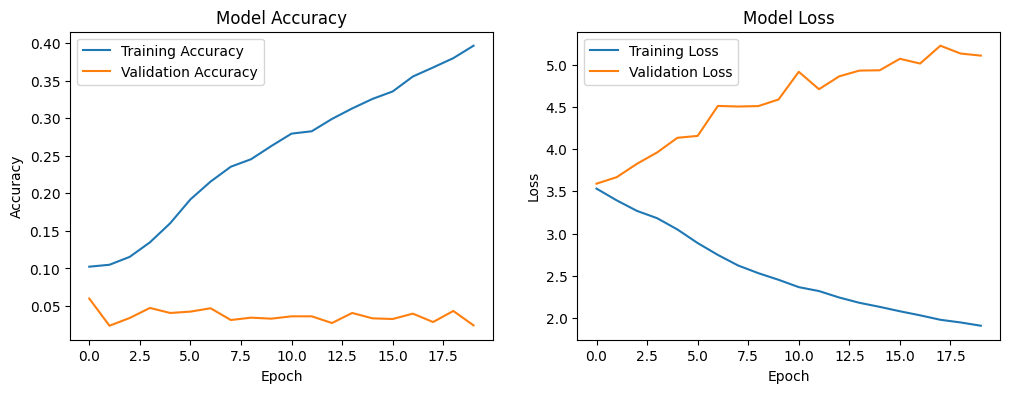

In [28]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()
